# 03a. Mapping State by State

Now that I have a pretty good set of points, I wanted to visualize these against maps for the states. For example, is it possible to see all of the grants in a given state for a given time period? Could I look at different states? What about all of the continental states? For these kinds of questions, geopandas has a lot of built-in tools for filtering the clean data, as well as for outputting a few initial maps. Below, I walk through a process to develop state-by-state maps. This uses some of the filtering capacities of pandas in combination with the mapping visualization tools of geopandas. Let's go! 

## Set up the environment

This activity will only use two python modules: geopandas and matplotlib. However, it also requires the clean dataset that I developed previously. Since that was saved as a geojson file, it is now reusable and serves as the basis for these examples. The data file is included in the repository as `neh_1960s_grants.geojson`. I am still exploring this data, so rather than looking at the entirety of the NEH data that was available, I continue working with the 1960s decade as before.    

In [1]:
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

## Start with the geojson

Having the previously created and saved geojson data, which is already cleaned and transformed to include valid POINT coordinates, now I can use the file to load in data rather than going through the cleaning and transformation process again.

In [2]:
gdf_neh_1960s = gpd.read_file('neh_1960s_grants.geojson', driver='GeoJSON')

In [3]:
gdf_neh_1960s.head()

,AppNumber,Institution,InstCity,InstState,InstPostalCode,InstCountry,CongressionalDistrict,Latitude,Longitude,YearAwarded,ProjectTitle,Program,Division,AwardOutright,ProjectDesc,ToSupport,Participants,Disciplines,geometry
0,FB-10007-68,"Regents of the University of California, Berkeley",Berkeley,CA,94704-5940,USA,13,37.87029,-122.26813,1967,Title not available,Fellowships for Younger Scholars,Fellowships and Seminars,8387.0,No description,No to support statement,John Elliot [Project Director],English,POINT (-122.26813 37.87029)
1,FB-10009-68,Pitzer College,Claremont,CA,91711-6101,USA,27,34.10373,-117.70701,1967,Title not available,Fellowships for Younger Scholars,Fellowships and Seminars,8387.0,No description,No to support statement,Steven Matthysse [Project Director],History of Religion,POINT (-117.70701 34.10373)
2,FB-10015-68,"University of California, Riverside",Riverside,CA,92521-0001,USA,41,33.97561,-117.33113,1967,Title not available,Fellowships for Younger Scholars,Fellowships and Seminars,8387.0,No description,No to support statement,John Staude [Project Director],"History, General",POINT (-117.33113 33.97561)
3,FB-10019-68,Northeastern University,Boston,MA,02115-5005,USA,7,42.33950,-71.09048,1967,Title not available,Fellowships for Younger Scholars,Fellowships and Seminars,8387.0,No description,No to support statement,Thomas Havens [Project Director],"History, General",POINT (-71.09048 42.33950)
4,FB-10023-68,University of Pennsylvania,Philadelphia,PA,19104-6205,USA,3,39.95298,-75.19276,1967,Title not available,Fellowships for Younger Scholars,Fellowships and Seminars,8387.0,No description,No to support statement,Gresham Riley [Project Director],Psychology,POINT (-75.19276 39.95298)


In [4]:
gdf_neh_1960s.shape

(997, 19)

It looks like the data import worked well. The first four records appear as I would've expected, and the `.shape` call tells me there are 997 records, which is what it should be.

## Mapping State by State

Now I can use geopandas to filter the data to create different kinds of maps,
and to export maps to files that can be reused in reports. 

### Define and use map shapes for US states

The project to clean and check data quality focused on information with single, clear geographic coordinates, aka POINTs. For more complex maps, I need to use some additional geospatial data types. Geospatial data and visualization most frequently uses 2D shapes, called Polygons or Multipolygons, which are used to represent areas on maps like states or countries. In this task to create state maps, I will need to pair the point data with the states' shape data. Rather than going to data.gov, which is where the NEH data can be found, I used the useful [US state shape data that Eric Celeste has made available](http://eric.clst.org/tech/usgeojson), which makes it easy to get geojson and various levels of detail. 

Fortunately, the US state shapes are well defined, and the Census Bureau and others make the information readily available. This section explains how to import the shapes for US states, how to display the shapes, and then how to display the points for each grant on the state shapes.  

In [5]:
# test the states shapefile

us_states = gpd.read_file('gz_2010_us_040_00_5m.json')

us_states.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [6]:
type(us_states)

geopandas.geodataframe.GeoDataFrame

In [7]:
type(us_states['geometry'])

geopandas.geoseries.GeoSeries

I expected the data to be imported as a GeoDataFrame, which it is, and I confirmed that the `geometry` column is a series data. In the display of the data, also note that the geometry types are all "Polygon" or "Multipolygon". (The latter is a separate datatype that is required when states have non-contiguous parts, like the Hawaiian islands.) Note that the `NAME` column has the full state name, which I will use to reference the shapes.

Next, I want to see how the shapes look using the `.plot()` method:

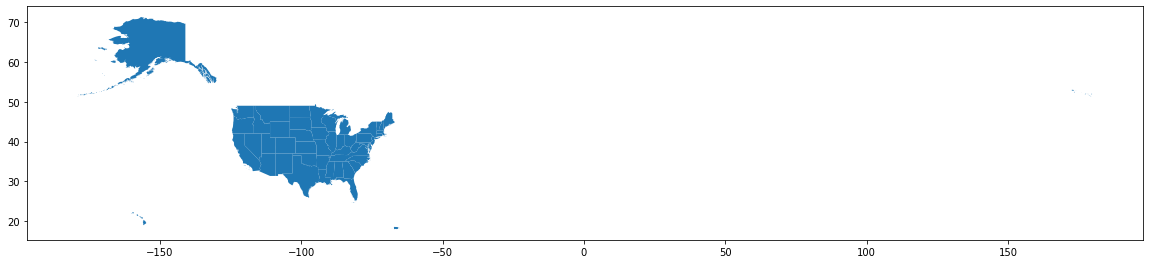

In [8]:
# nb: the first time I ran this, it required installation of the descartes module
us_states.plot(figsize=(20,20))

The proportions look a bit strange with all of that whitespace on the right, but on a close inspection I can see at the far right that there are a few of the Aleutian Islands flowing across the dateline. See the small blue dots over to the right? Very small, but they are there! Other than that... pretty cool! This is what I wanted!

Now I'll refine this a bit more to show the continental US... (with apologies, but I am leaving the display of Alaska, Hawaii, and Puerto Rico for a future project).

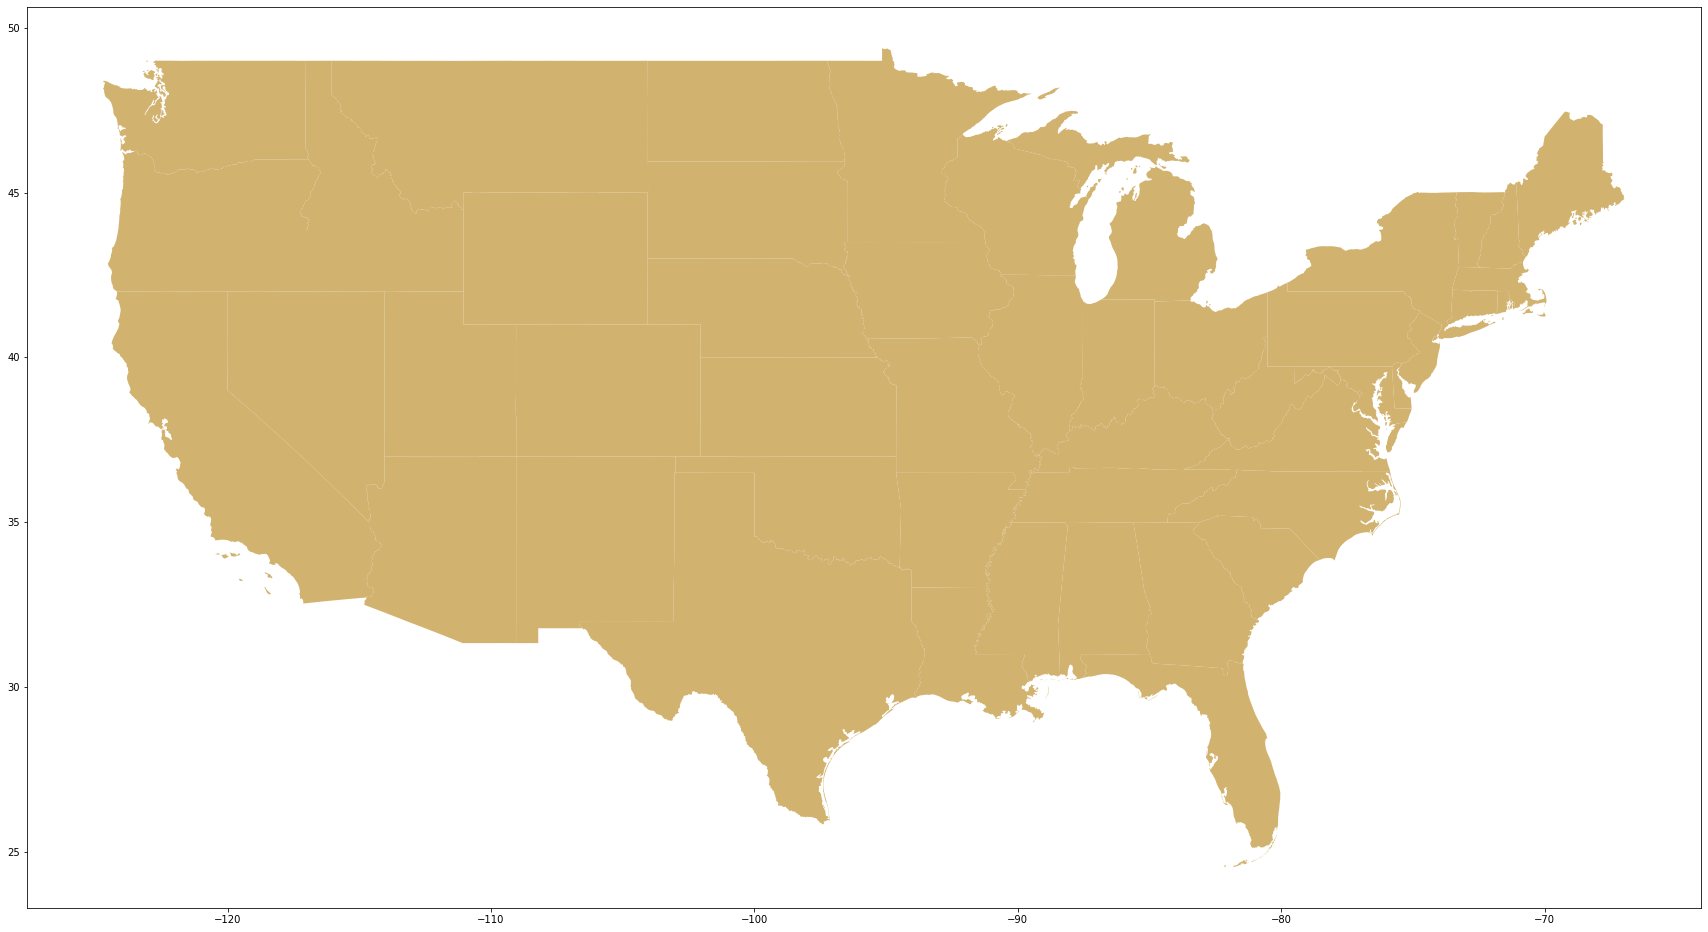

In [9]:
# for illustration, exclude Alaska & Hawaii & Puerto Rico
continental = us_states[us_states['NAME'].isin(['Alaska','Hawaii', 'Puerto Rico']) == False]

continental.plot(figsize=(30,20), color='#d1b26f')

That looks good! Note above that I used the geopandas function `.isin()` above to filter out any shapes that did not appear in the list using a boolean filter ("False"). 

Similarly, I can "zoom in" and look at just a single state. Again using the `.isin()` function, but this time the opposite boolean value is set to "True":

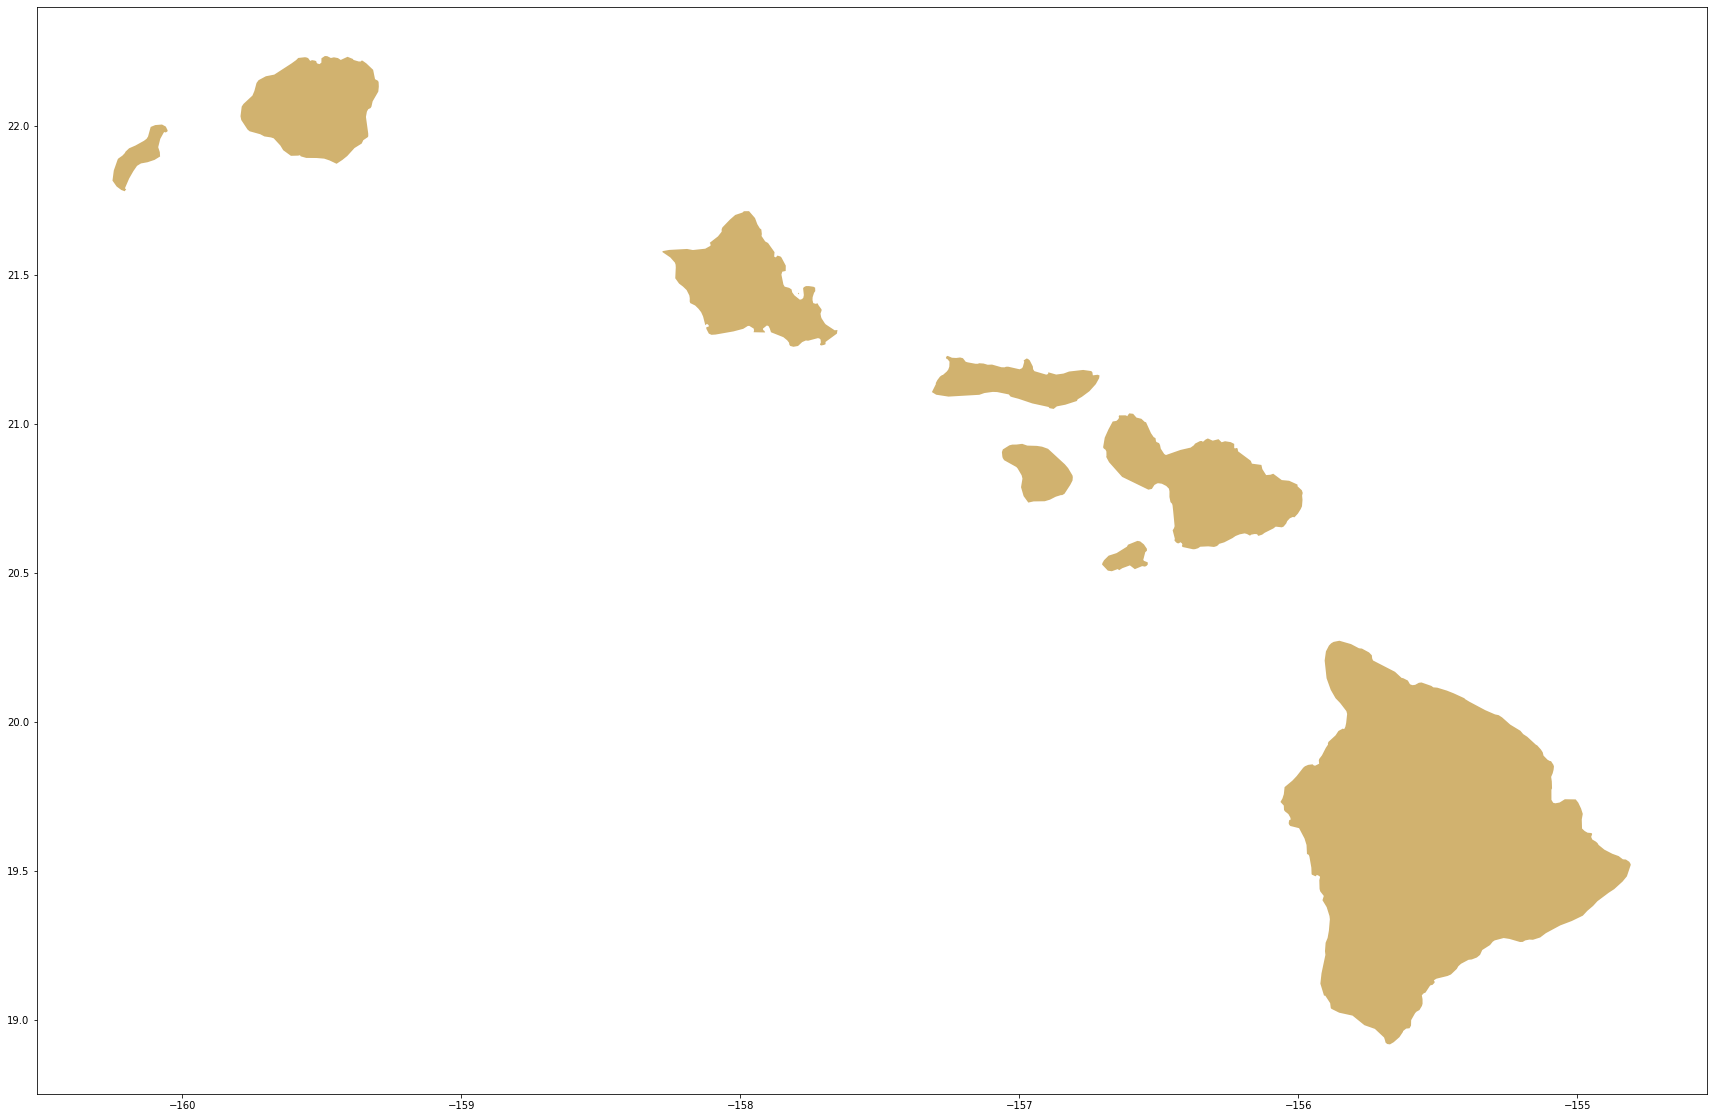

In [10]:
# display shape for a single state

hawaii = us_states[us_states['NAME'].isin(['Hawaii']) == True]

hawaii.plot(figsize=(30,20), color='#d1b26f')

Yes, that looks like Hawaii!! And note that it's a great example of a "multipolygon" state :smile: 

Now, let's plot the coordinates on these shapes...

## Plot the points in the states

Now that I can draw the states, I want to plot the grant point data! This section begins using the `matplotlib` module for expanded visualization capabilities, such as the inclusion of a title and setting colors.

### Map the grants in Minnesota

For example, to display the grants in one state, I can use filtering to pull grants given to the state of Minnesota, and likewise filter to display the Minnesota state shape. Note I have added the "figure" (figure) and "axis" (ax) components, which the visualization library is using to render different parts of the image. I have also set colors in the arguments provided to the `.plot()` functions.

In [11]:
# set the desired data
state = 'Minnesota'
Minnesota_1960s_grants = gdf_neh_1960s[gdf_neh_1960s['InstState'] == 'MN']

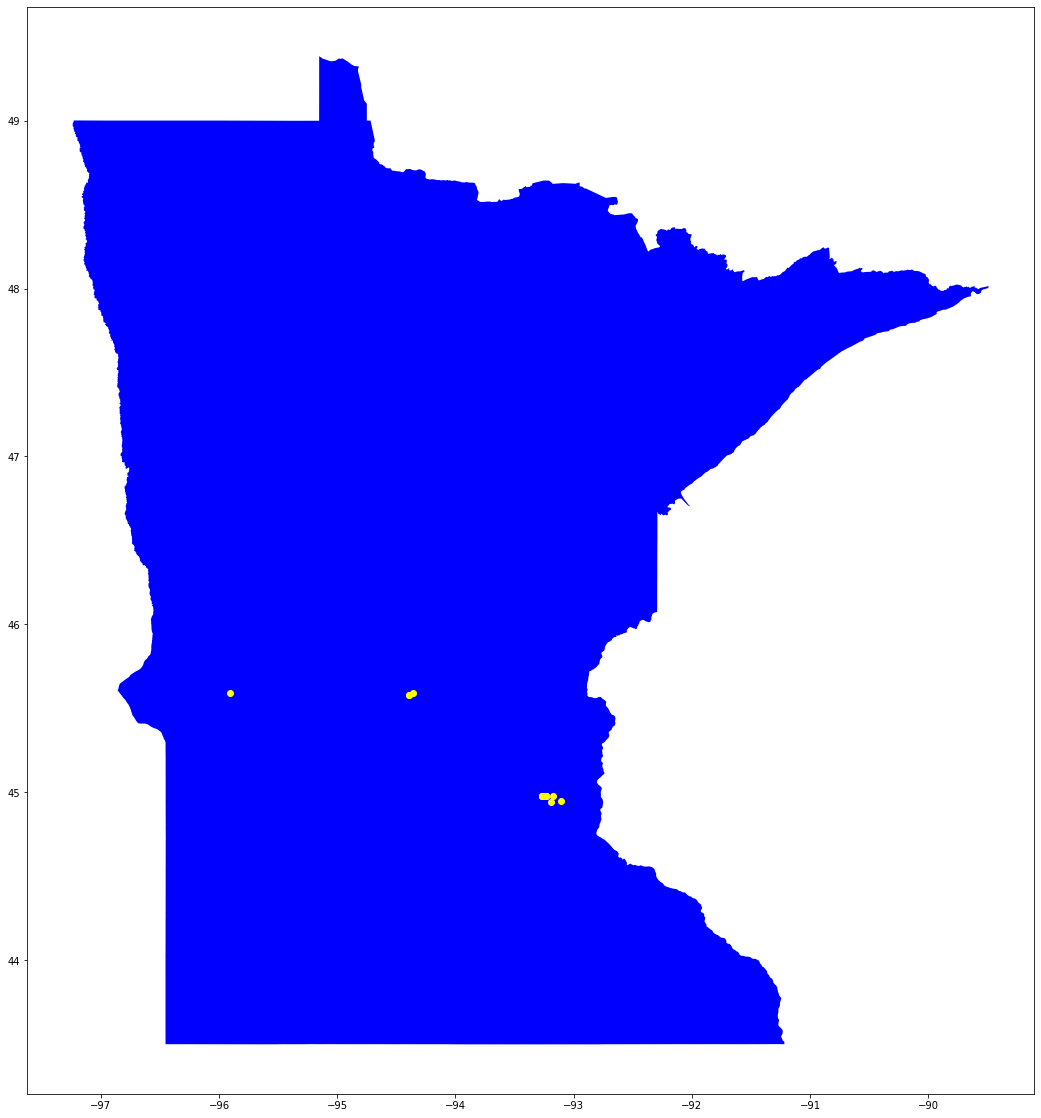

In [12]:
# plt to see the points on the map
fig, ax = plt.subplots(1, figsize=(30,20))
base = us_states[us_states['NAME'].isin([state]) == True].plot(ax=ax, color='blue')

# plot the positions
Minnesota_1960s_grants.plot(ax=base, color='yellow')

plt.show()

Woohoo! This is the first thing that really looks like a map! A clear, visually simple, graphic that combines the geographic shape information with the grant data from the NEH to show where the money went!

### Map the grants in any US state

Now, let's make this more dynamic: create options that allow for easier generation of maps for any state. 

First, set map parameters to select a state (lines 2 and 3), filter the data based on the selections (line 6), 
draw out some basic information that can be used in the graphic (lines 8 through 32), then plot the selected data (line 34 and following). I've used pandas filters to draw out various information, like a starting year and ending year, to determine the number of grants that are shown in the image, to sum the dollar amounts of the awards, and to specify colors for the output; most of this information is bundled into the `displayInfo` dictionary.
On line 42, I used python's string `format` substitution methods with some text filtering ([see here for a guide from RealPython](https://realpython.com/python-formatted-output/)), to provide some well-formatted information for the image title and legend.

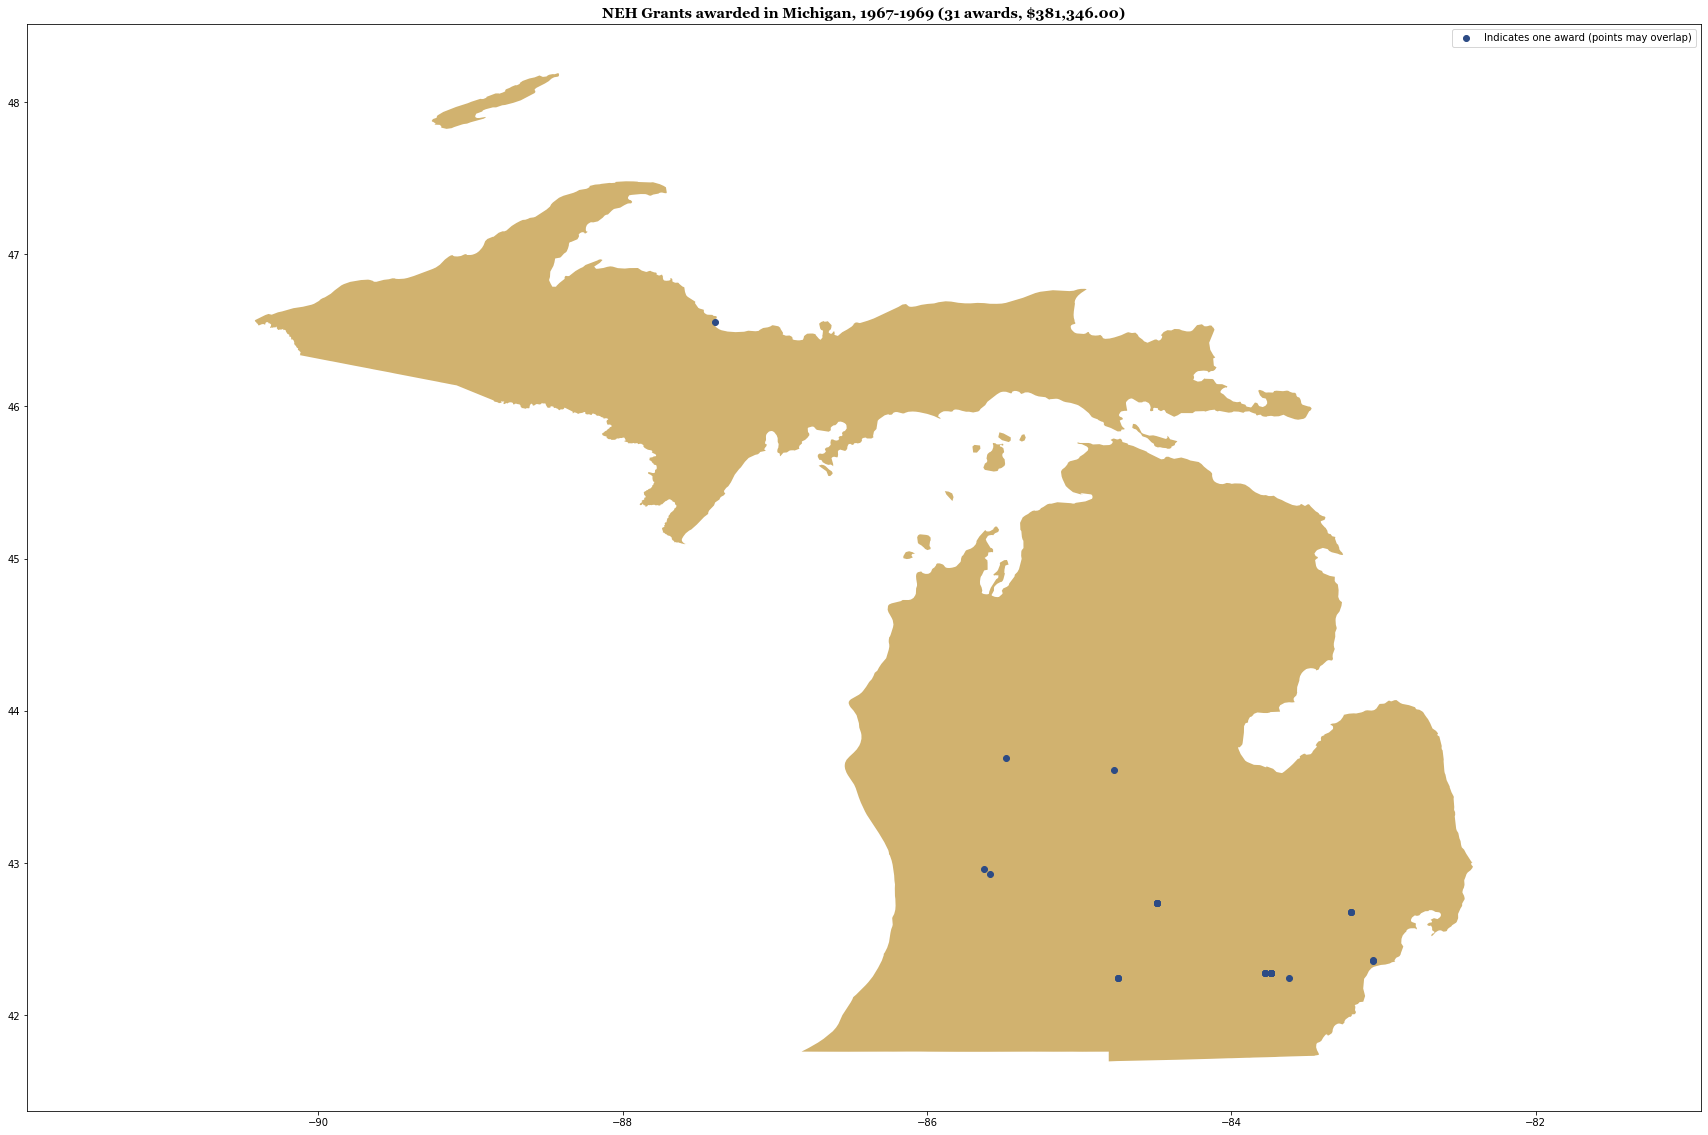

In [13]:
# set the state info - to map other states, change the next two lines
stateAbbrev = 'MI' #use standardized 2-letter postal abbreviations
state = 'Michigan' #use full name of state written out with spaces and no diacritics

# filter the data
state_1960s_grants = gdf_neh_1960s[gdf_neh_1960s['InstState'] == stateAbbrev]

# get label info
#start year
startYear = state_1960s_grants['YearAwarded'].min()
#end year
endYear = state_1960s_grants['YearAwarded'].max()
#number of awards
numGrants = state_1960s_grants['AppNumber'].count()
#dollars awarded
totalOutright = state_1960s_grants['AwardOutright'].sum()
#map shape color
map_color = '#d1b26f'
#point color
point_color = '#2C4B85'

# create a bundle of info for display rendering
displayInfo = {
    'startYear' : startYear,
    'endYear' : endYear,
    'numGrants' : numGrants,
    'outrightDollars': totalOutright,
    'map_color' : map_color,
    'point_color' : point_color,
    'state' : state,
    'abbrev' : stateAbbrev
}

# plt to see the points on the map
fig, ax = plt.subplots(1, figsize=(30,20))
base = us_states[us_states['NAME'].isin([state]) == True].plot(ax=ax, color=map_color)

# plot the positions
state_1960s_grants.plot(ax=base, color=point_color, legend=True)

# add title and legends
plt.title('NEH Grants awarded in {0[state]}, {0[startYear]}-{0[endYear]} ({0[numGrants]} awards, ${0[outrightDollars]:,.2f})'.format(displayInfo), fontfamily=['Georgia','serif'], fontweight='bold', fontsize='x-large') # title uses some advanced string formatting to display the total $ amounts as a currency display
plt.legend(['Indicates one award (points may overlap)'])
lims = plt.axis('equal') # not sure what this is actually doing, although some states seem less 'squished'

plt.show()

The map looks a bit squashed top to bottom, but aside from that, this is a great start!

### Map the grants in multiple states

Now, what if I want to mape the grants from more than one state? One of my goals is to map the points of all the grants in the continental US. Using similar filtering functiosn to those I used above (`.isin()` and boolean filters), I can exclude the data that I don't want. Note the specialized use of the `~` character here, in line 5, which reverses the filter, effectively displaying anything that is "False," that is to say it will return all the values not in the exclude set.

(In this case, my desired visualization focused on many states, so it was easy to filter out a handful. If you are working with a smaller group of states, an inclusive filtering approach might work better.)

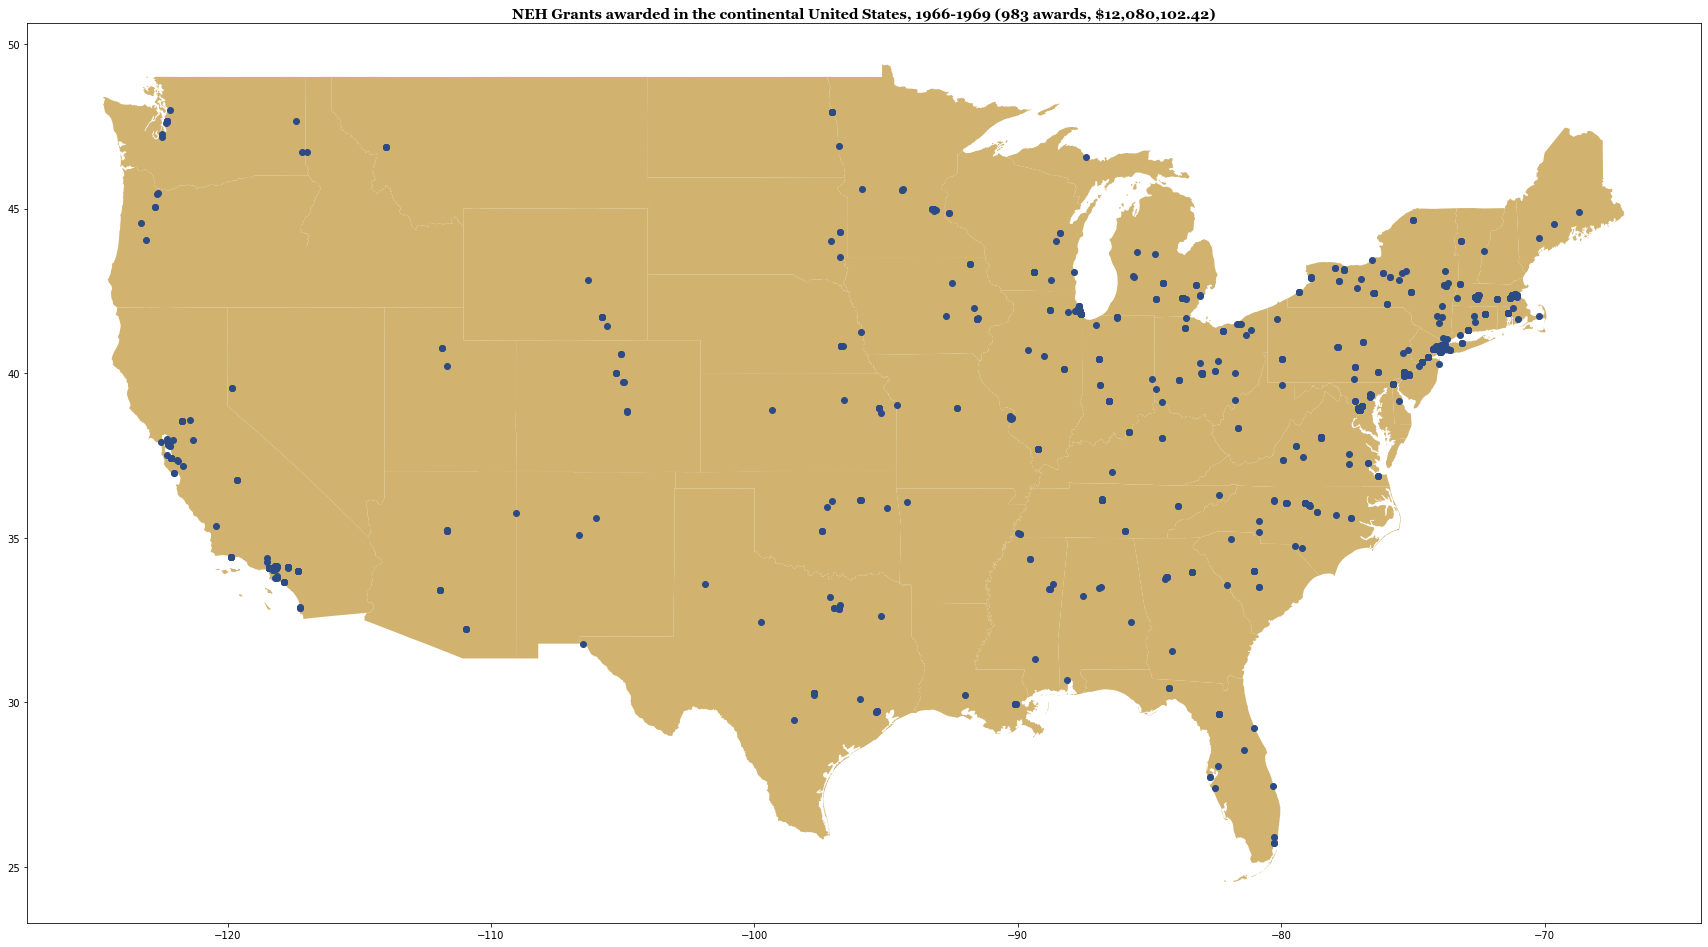

In [14]:
exclude = ['Alaska','Hawaii', 'Puerto Rico']
excludeAbbrev = ['AK','HI','PR']

# filter the data
state_grant_info = gdf_neh_1960s[~gdf_neh_1960s.InstState.isin(excludeAbbrev)]

# basic summary information for title
#number of awards
numGrants = state_grant_info['AppNumber'].count()
#dollars awarded
totalOutright = state_grant_info['AwardOutright'].sum()

#plot the map & points
fig, ax = plt.subplots(1, figsize=(30,20))

# filter the base map
base = us_states[us_states['NAME'].isin(exclude) == False].plot(ax=ax, color='#d1b26f')

# plot the positions
state_grant_info.plot(ax=base, color='#2C4B85')

plt.title('NEH Grants awarded in the continental United States, 1966-1969 ({0} awards, ${1:,.2f})'.format(numGrants, totalOutright), fontfamily=['Georgia','serif'], fontweight='bold', fontsize='x-large')
plt.show()

And there we have it! A map of the continental US, with the location of each NEH grant recipient of the 1960s displayed! 

There are still a few more things that might be useful, including drawing in Alaska, Hawaii, and Puerto Rico, which also received grants during this time. Additionally, the NEH does make awards to other entities, including Guam, the US Virgin Islands, and American Samoa, so there could be a lot of additional tweaking necessary. 

Since everyone is looking at things on the web and on their phones these days, an interactive "slippy" web map would also be nice for display. Those are tasks that I may explore in future installments. For the purposes of this demonstration, however, the map is ready!

## Move in Alaska & Hawaii

Using [shapely.affinity.translate()](https://shapely.readthedocs.io/en/stable/manual.html#shapely.affinity.translate) & examples https://stackoverflow.com/questions/39516553/how-move-a-multipolygon-with-geopandas-in-python2

TODO: 
* move Alaska & Hawaii into the picture... (see Aleszu Bajas, "[How to shift Alaska and Hawaii below the lower 48 for your interactive choropleth map](https://www.storybench.org/how-to-shift-alaska-and-hawaii-below-the-lower-48-for-your-interactive-choropleth-map/)", _Storybench_ 2 April 2020, which works through this task in R Studio), and see also Lo Benichou, "Mapping the US elections: Guide to Albers USA projection in Studio," from Mapbox, 24 Feb 2020, https://blog.mapbox.com/mapping-the-us-elections-guide-to-albers-usa-projection-in-studio-45be6bafbd7e

# Next Steps

Although this notebook achieved the map that I wanted to create when I started, there are still a lot of other interesting things that could be done with this process, including:
* create functions to automate the data quality checking, cleaning, and transformation process so that additional decades of the NEH can be represented
* create a more interactive and dynamic map. Possible to use leaflet.js or mapboxGL.js to map some of the filtered data? 
* create popups that give info on the grant on mouseover
* a sort of interactive static map that shows grants by congressional district? This would require further data cleaning, but could be possible (see Aleszu Bajas's [piece here](https://www.storybench.org/how-to-shift-alaska-and-hawaii-below-the-lower-48-for-your-interactive-choropleth-map/))
* add background map, as explained [here](https://geopandas.org/gallery/plotting_basemap_background.html). @darribas works through the process using [contextily](https://github.com/darribas/contextily) on a GS84 projection. This "looks" like the more colorful internet maps that people are currently used to, though it is not yet interactive. 

The processes outlined in this notebook draw heavily on the steps described in Duong Vu's tutorial for _Datacamp_ and the overview by Dani Arribas-Bel; Eric Celeste's collection of state shapefiles were a welcome resource that didn't require sifting through various census and USGS data.

## Reference list

Credit to the examples in these tutorials and projects (as of January 2021), which were highly informative to the exploratory work outlined above:

* Duong Vu, "[Introduction to Geospatial Data in Python](http://datacamp.com/community/tutorials/geospatial-data-python)" at _Datacamp_, published 24 October 2018.
* Lesley Cordero, "[Getting Started on Geospatial Analysis with Python, GeoJSON and GeoPandas](https://www.twilio.com/blog/2017/08/geospatial-analysis-python-geojson-geopandas.html)" at Twilio, published 14 August 2017.
* Dani Arribas-Bel, "[Mapping in Python with geopandas](http://darribas.org/gds15/content/labs/lab_03.html)", from Geographic Data Science '15. Provides a lot of useful information about creating more complex plots.

See this site for US state shapefile information: 

* Eric Celeste http://eric.clst.org/tech/usgeojson

### Interesting mapping projects with historical data
* Selena Qian, "[Sanborn Maps Navigator](https://github.com/selenaqian/sanborn-maps-navigator)", example of creating a map interface to explore an inventory of the Sanborn maps at the Library of Congress.
* USGS historical atlas explorer https://livingatlas.arcgis.com/topoexplorer/index.html
* "[Keweenaw Time Traveler](https://www.keweenawhistory.com/)," an interactive historical GIS project from the Historic Environments and Spatial Analytics Lab at Michigan Technological University.